<a href="https://colab.research.google.com/github/NicKostii/UniProjects/blob/main/Car_prediction_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Імпорт


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/car_price_prediction.csv")

# Загальний обзор

Розглянемо інформацію датасету.

In [ ]:
df.head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Як можно побачити деякі колонки таки як Mileage треба модифікувати в зручний формат int.

<Axes: >

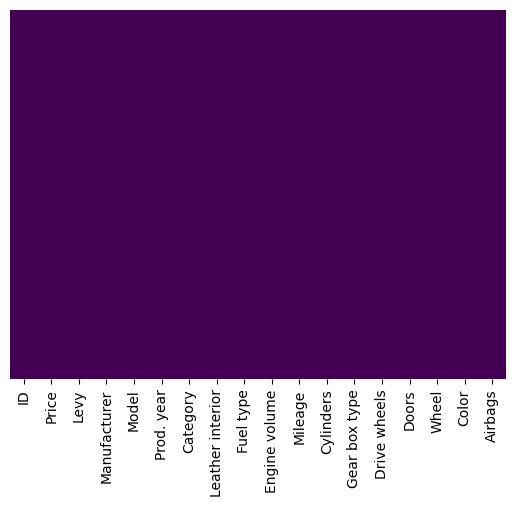

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Значень NULL не має.

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].nunique())

ID
18924
Price
2315
Levy
559
Manufacturer
65
Model
1590
Prod. year
54
Category
11
Leather interior
2
Fuel type
7
Engine volume
107
Mileage
7687
Cylinders
13
Gear box type
4
Drive wheels
3
Doors
3
Wheel
2
Color
16
Airbags
17


Деякі колонки, які не можно напряму трнасофрмувати в int, такі як Model, необхідно перетворити та модифікувати, адже унікальних значень забагато для one-hot encoding'у.

# Розгляд та мінімальна необхідна обробка окремих колонок

## ID

Значення-ідентифікатори прикладів.

In [ ]:
df["ID"]

,ID
0,45654403
1,44731507
2,45774419
3,45769185
4,45809263
...,...
19232,45798355
19233,45778856
19234,45804997
19235,45793526


In [ ]:
len(df["ID"].unique())

18924

Як можно побачити кілкьість унікальних значень менша за кількість прикладів, отже значення не унікальні.
Давайте порівняємо приклади з однаковим ID.

In [ ]:
df['ID'].value_counts()[df['ID'].value_counts() > 1]

,count
ID,
45815365,8
45815361,8
45815363,7
45815368,7
45723475,7
...,...
42444388,2
45654826,2
45815407,2


In [ ]:
df[df['ID'] == 45815365]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2767,45815365,7213,-,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,185000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4
7444,45815365,7213,-,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,185000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4
9779,45815365,7213,-,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,185000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4
9847,45815365,7213,-,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,185000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4
12389,45815365,7213,-,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,185000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4
15052,45815365,7213,-,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,185000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4
16529,45815365,7213,-,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,185000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4
17285,45815365,7213,-,MAZDA,Demio evropuli,2003,Hatchback,No,CNG,1.4,185000 km,4.0,Manual,Front,04-May,Left wheel,Blue,4


In [ ]:
df[df['ID'] == 45815361	]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1286,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6
3919,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6
6871,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6
11499,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6
13065,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6
14637,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6
17204,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6
18968,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6


Судячи з усього це просто повтори, треба прибрати однакові приклади і залишити лише один унікальний.

In [ ]:
df.drop_duplicates(subset='ID', inplace = True)

In [ ]:
df['ID'].value_counts()[df['ID'].value_counts() > 1]

,count
ID,


Ми позбавилися дублікатів. В цілому саму колонку теж можно прибрати адже вона не несе корисної інформації.

In [ ]:
df.drop('ID', axis=1, inplace=True)

## Price

Розглянемо таргет колонку.

<Axes: ylabel='Price'>

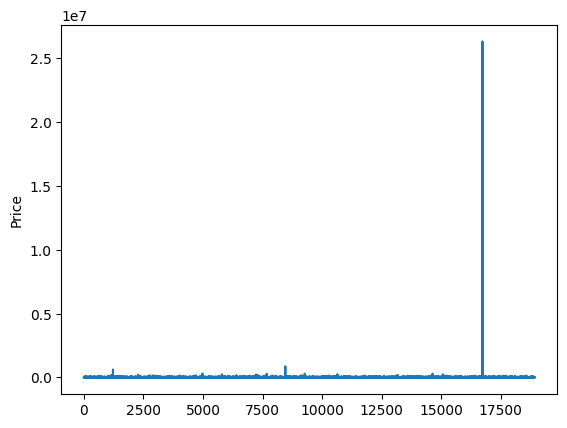

In [ ]:
sns.lineplot(data = df, x=np.arange(1, len(df) + 1) , y = 'Price' )

Можно побачити артефакт в інормації.

In [ ]:
df.loc[df['Price'].idxmax()]

,16983
Price,26307500
Levy,-
Manufacturer,OPEL
Model,Combo
Prod. year,1999
Category,Goods wagon
Leather interior,No
Fuel type,Diesel
Engine volume,1.7
Mileage,99999 km


Це якась стара бюджетна машина, а якийсь мега уьтра раритет, тому цей приклад точно помилковий. Видалимо його.

In [ ]:
df = df.drop(df['Price'].idxmax())

<Axes: ylabel='Price'>

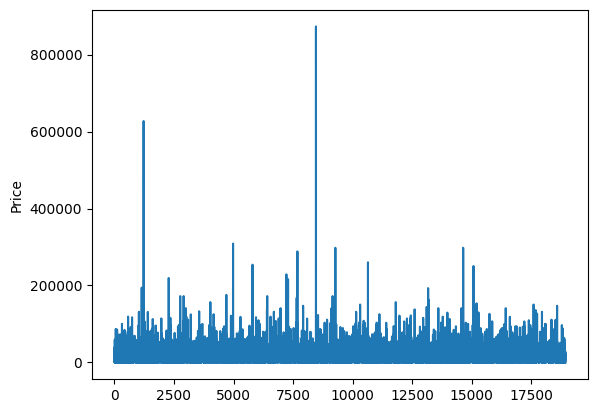

In [ ]:
sns.lineplot(data = df, x=np.arange(1, len(df) + 1) , y = 'Price' )

Тепер видно що в нас все ще є якась кількість потенційно аномальних та помилкових прикладів. Спробую застосувати 3 сігмовий критерій та видалю їх.

In [ ]:
mean_price = df['Price'].mean()
std_dev_price = df['Price'].std()

lower_bound = mean_price - 3 * std_dev_price
upper_bound = mean_price + 3 * std_dev_price

df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

<Axes: ylabel='Price'>

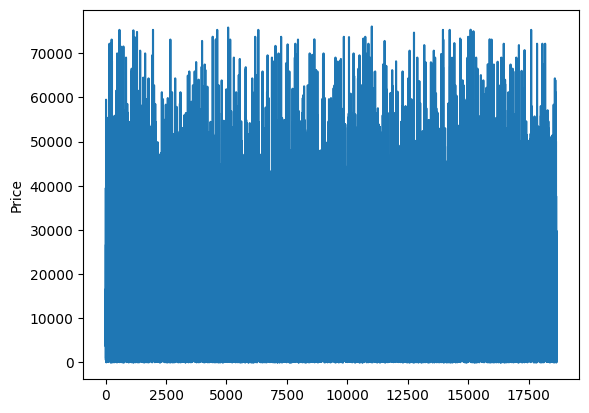

In [ ]:
sns.lineplot(data = df, x=np.arange(1, len(df) + 1) , y = 'Price' )

In [ ]:
len(df)

18662

<Axes: xlabel='Price', ylabel='Count'>

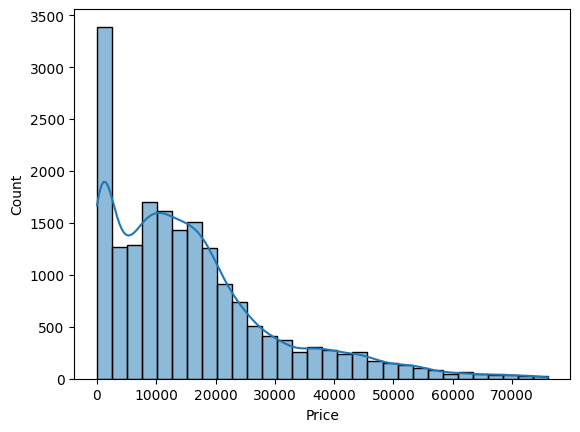

In [ ]:
sns.histplot(data = df, x='Price', bins = 30, kde = True )

Можно помітити що в нас підозріло багато прикладів ціною близькою до 0. Розглянемо подробніше.

<Axes: xlabel='Price', ylabel='Count'>

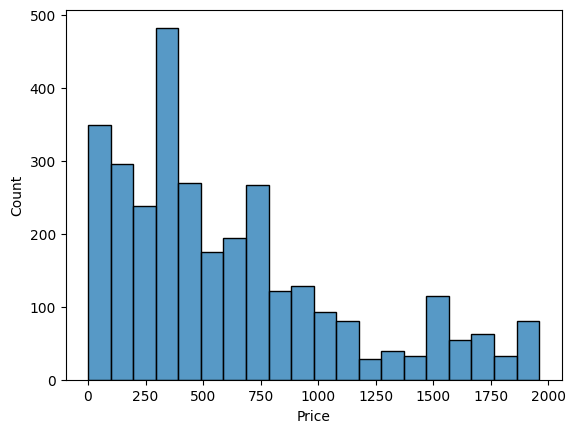

In [ ]:
sns.histplot(data = df[df['Price']<2000], x='Price', bins = 20 )

Особиста думка, така ціна за машину, навіть БУ, немає сенсу. ТОму приберемо значення <$500.

In [ ]:
df = df[df['Price'] > 500]

<Axes: xlabel='Price', ylabel='Count'>

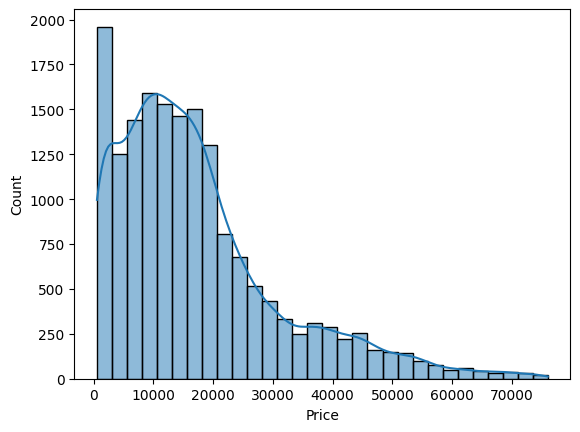

In [ ]:
sns.histplot(data = df, x='Price', bins = 30, kde = True )

Тепер виглядає більш природньо.

## Levy

In [ ]:
df['Levy']

,Levy
0,1399
1,1018
2,-
3,862
4,446
...,...
19231,1055
19232,-
19233,831
19234,836


Више можно побачити, що Levy має тип данних object, замість зрунчого int. Також в цій колонці присутні значення "-", які не є NULL значеннями, і так як ця колонка якось пов'язана з податковою системою на мою думку можно інтерпритувати її як відсутність податку, тобто, як значення, що дорівнює 0.

In [ ]:
df["Levy"] = np.where(df["Levy"] == "-" ,0 , df["Levy"]).astype(int)

<Axes: xlabel='Levy', ylabel='Count'>

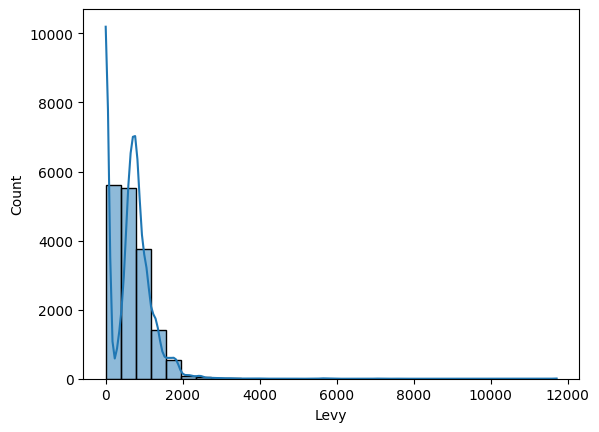

In [ ]:
sns.histplot(data = df, x='Levy', bins = 30, kde = True )

Можно побачити аномалію. Треба прибрати.

In [ ]:
mean = df['Levy'].mean()
std_dev = df['Levy'].std()

lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

df = df[(df['Levy'] >= lower_bound) & (df['Levy'] <= upper_bound)]

<Axes: xlabel='Levy', ylabel='Count'>

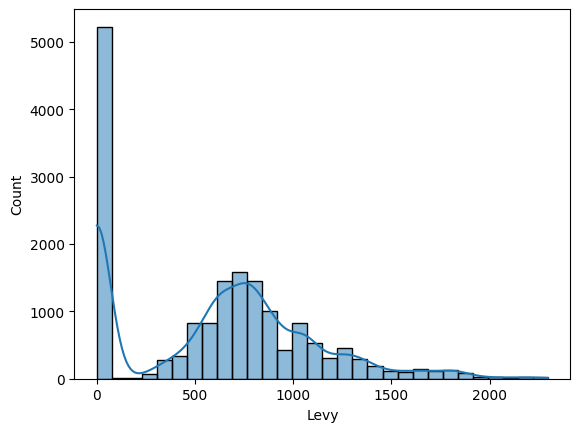

In [ ]:
sns.histplot(data = df, x='Levy', bins = 30, kde = True )

Розглянемо зв'язок з таргет колонкою.

<Axes: xlabel='Price', ylabel='Levy'>

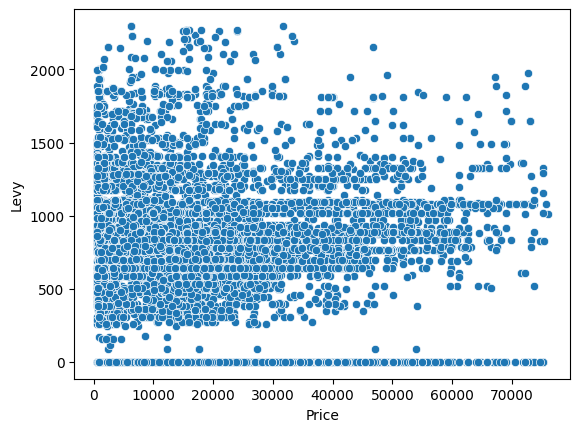

In [ ]:
sns.scatterplot(data=df, x='Price', y='Levy')

Можно помітити, що є категорія машин які неоподатковуються в усіх цінових категоріяї.
Загальна залежність слабка. Схоже, що більшість значень знаходяться 500-1000$ незалежно від ціни машини.

<Axes: xlabel='Price', ylabel='Levy'>

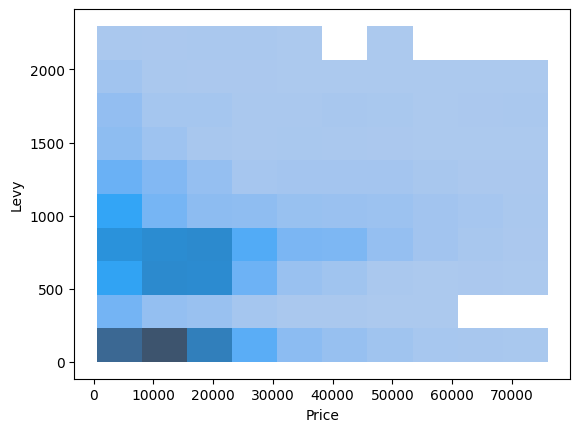

In [ ]:
sns.histplot(data=df, x='Price', y='Levy', bins = 10)

<Axes: xlabel='Price', ylabel='Levy'>

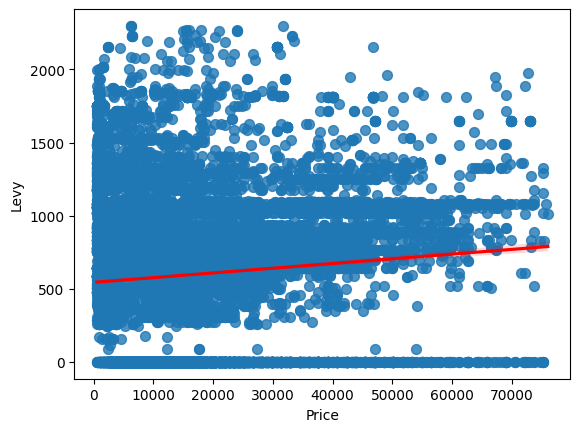

In [ ]:
sns.regplot(data=df, x='Price', y='Levy', scatter_kws={'s':50}, line_kws={'color':'red'})

## Manufacturer 🔧

<Axes: xlabel='Manufacturer', ylabel='count'>

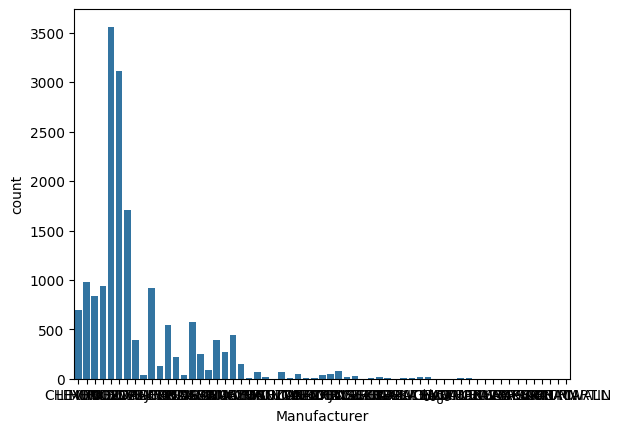

In [ ]:
sns.countplot(data = df, x = 'Manufacturer')

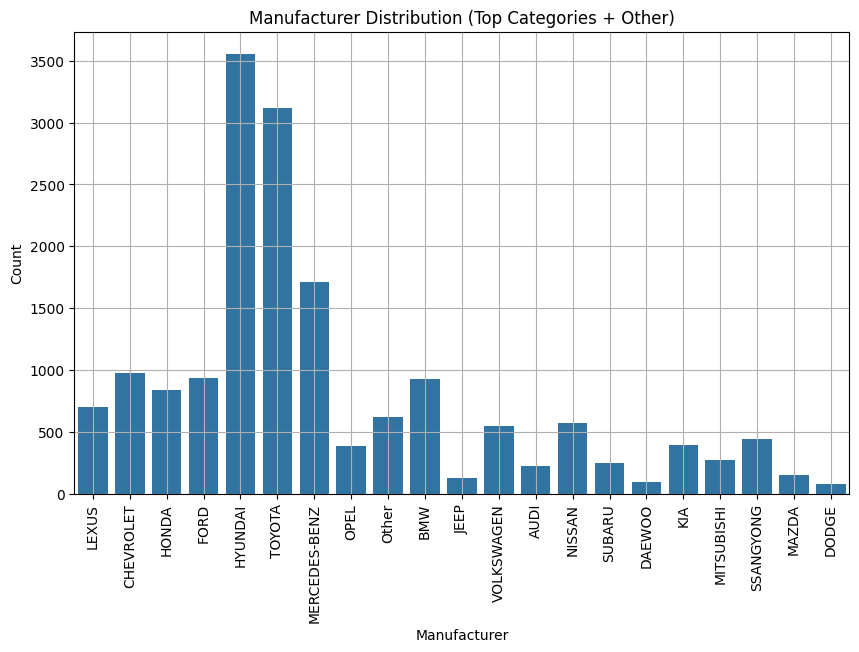

In [ ]:
df_temp = df.copy()
counts = df_temp['Manufacturer'].value_counts()
top_categories = counts.head(20).index
df_temp['Manufacturer'] = df_temp['Manufacturer'].apply(lambda x: x if x in top_categories else 'Other')

plt.figure(figsize=(10, 6))
sns.countplot(data=df_temp, x='Manufacturer')
plt.title('Manufacturer Distribution (Top Categories + Other)')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Виробників досить багато, тому відповідно треба значно Модифікувати цю колонку.

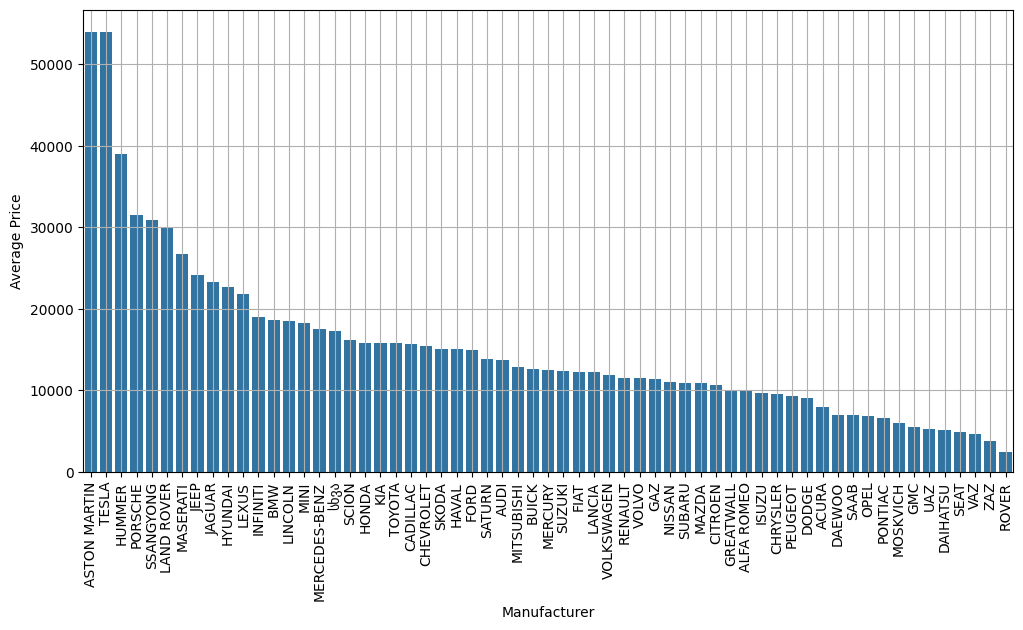

In [ ]:
agg_df = df.groupby('Manufacturer')['Price'].mean().reset_index()

agg_df = agg_df.sort_values(by='Price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=agg_df, x='Manufacturer', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Можно чітко побачити, що виробник дуже чітко пов'язаний з середньою ціною.

## Model 🔧

In [ ]:
len(df["Model"].unique())

1494

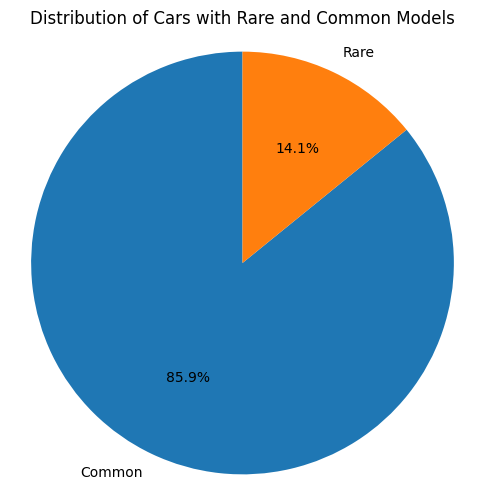

In [ ]:
model_counts = df['Model'].value_counts()

group = df['Model'].apply(lambda x: 'Rare' if model_counts[x] <= 10 else 'Common')

group_counts = group.value_counts()

plt.figure(figsize=(6, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%',  startangle=90)
plt.title('Distribution of Cars with Rare and Common Models')
plt.axis('equal')
plt.show()

In [ ]:
df['Model'].value_counts()[df['Model'].value_counts() <= 10]

,count
Model,
Cerato,10
Avella,10
Viano,10
CLS 550,10
Matiz,10
...,...
RAV 4 XLE,1
Golf 2,1
GLK 300,1


In [ ]:
df['Model'].value_counts()[df['Model'].value_counts() > 10]

,count
Model,
Sonata,984
Prius,901
Elantra,871
Camry,782
Santa FE,497
...,...
Astra H,11
S 500,11
Avenger,11


Тобто можно побачити, що 191 з 1494 моделей займає 85% датасету.

## Prod. year

In [ ]:
df["Prod. year"]

,Prod. year
0,2010
1,2011
2,2006
3,2011
4,2014
...,...
19231,2013
19232,1999
19233,2011
19234,2010


<Axes: xlabel='Prod. year', ylabel='Price'>

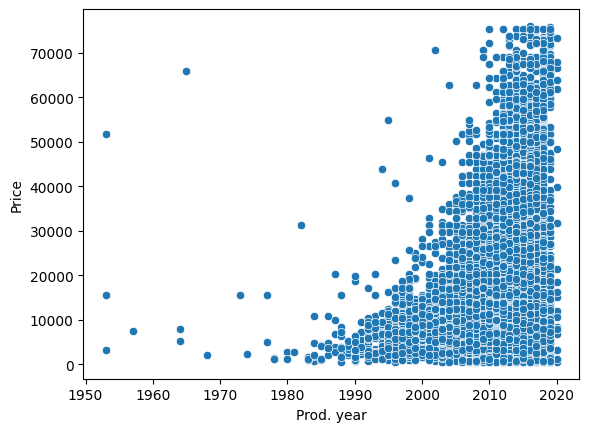

In [ ]:
sns.scatterplot(data=df, y='Price', x='Prod. year')

<Axes: xlabel='Prod. year', ylabel='Price'>

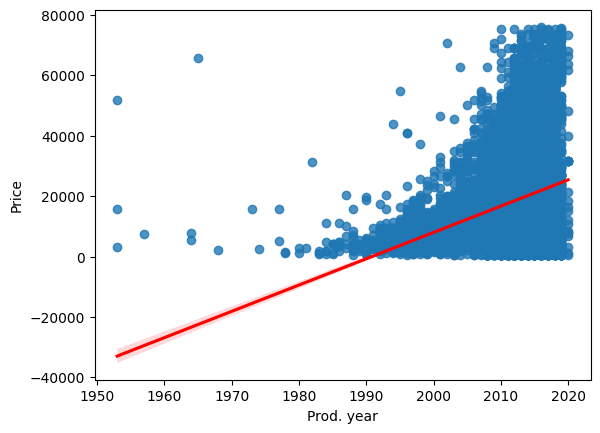

In [ ]:
sns.regplot(data=df, y='Price', x='Prod. year', line_kws={'color':'red'})

<Axes: xlabel='Prod. year', ylabel='Price'>

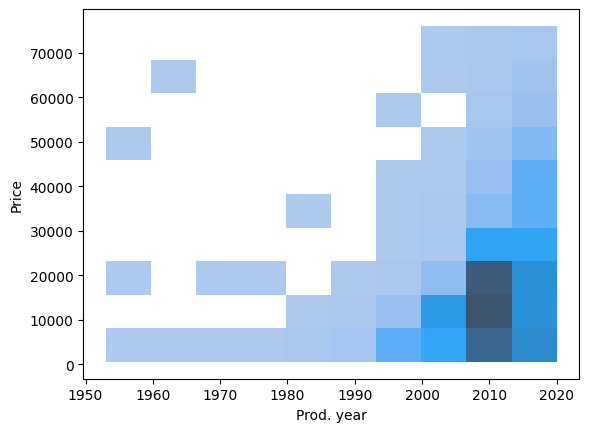

In [ ]:
sns.histplot(data=df, y='Price', x='Prod. year', bins = 10)

Новіша машина - вища ціна.

## Category 🔧

In [ ]:
df["Category"]

,Category
0,Jeep
1,Jeep
2,Hatchback
3,Jeep
4,Hatchback
...,...
19231,Sedan
19232,Coupe
19233,Sedan
19234,Jeep


In [ ]:
len(df["Category"].unique())

11

Text(0, 0.5, 'Count')

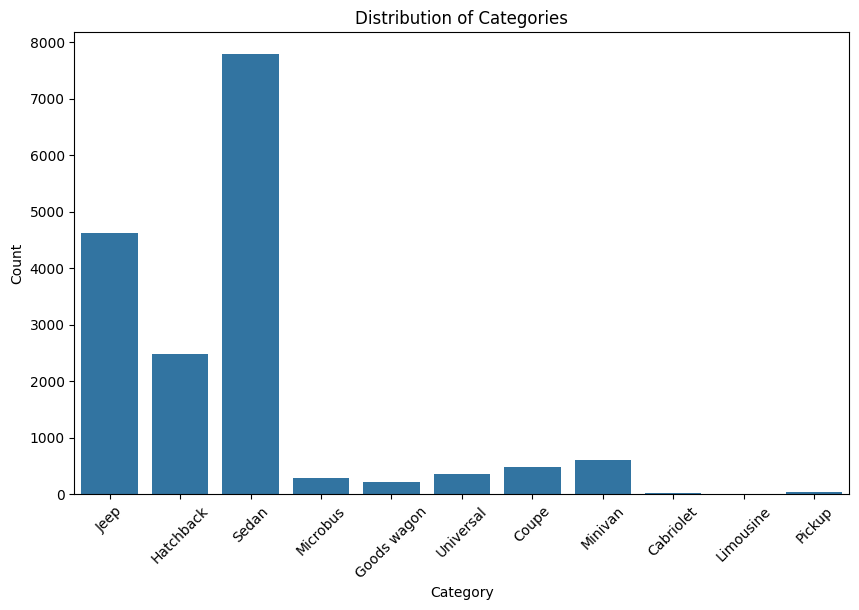

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category')

plt.xticks(rotation=45)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

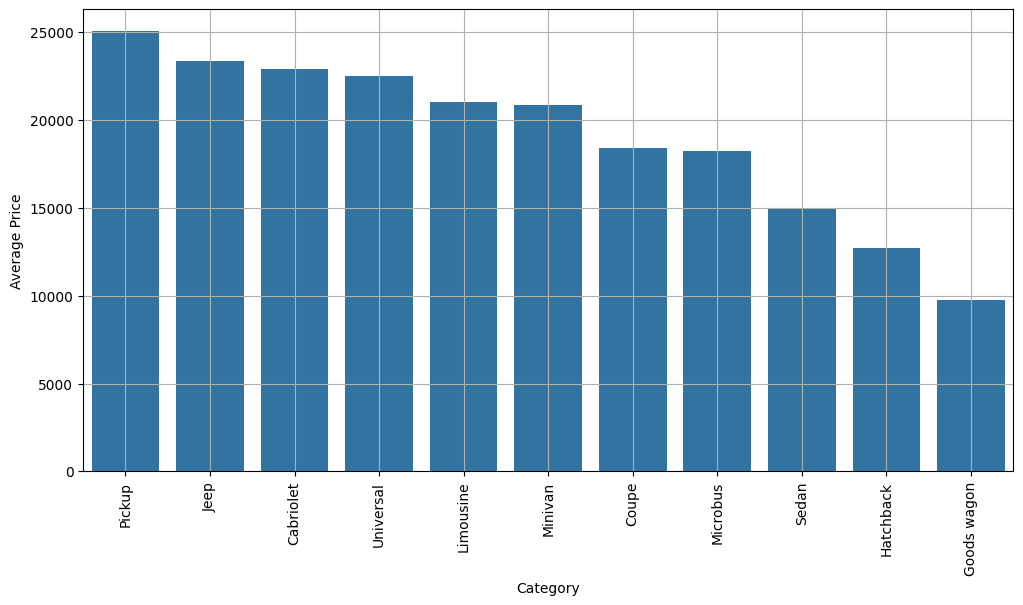

In [ ]:
agg_df = df.groupby('Category')['Price'].mean().reset_index()

agg_df = agg_df.sort_values(by='Price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=agg_df, x='Category', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Окей, це було трохи несподівано. Можливо ми відсіяли лімузіни та кабріолети як аномальні значення, але вони нижче ніж очикувано.

## Leather interior

In [ ]:
df["Leather interior"]

,Leather interior
0,Yes
1,No
2,No
3,Yes
4,Yes
...,...
19231,Yes
19232,Yes
19233,Yes
19234,Yes


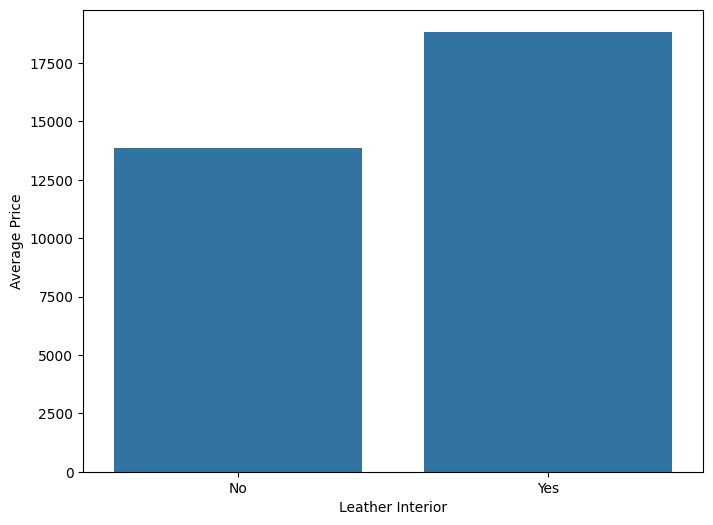

In [ ]:
avg_price_by_leather = df.groupby('Leather interior')['Price'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_price_by_leather.index, y=avg_price_by_leather.values)

plt.xlabel('Leather Interior')
plt.ylabel('Average Price')

plt.show()

Нічого цікавого, те що шкіра буде дорожчею це очевидно. Варто лише додати що колонку слід одразу ж трансофртмуватив в 0 та 1.

In [ ]:
df['Leather interior'] = pd.get_dummies(df['Leather interior'], drop_first=True)

In [ ]:
df['Leather interior'] = df['Leather interior'].astype(int)

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Leather interior,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,1,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,0,0
2,8467,0,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,0,0
3,3607,862,FORD,Escape,2011,Jeep,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,1,0
4,11726,446,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,1,0


## Fuel type 🔧

In [ ]:
len(df["Fuel type"].unique())

7

<Axes: xlabel='Fuel type', ylabel='count'>

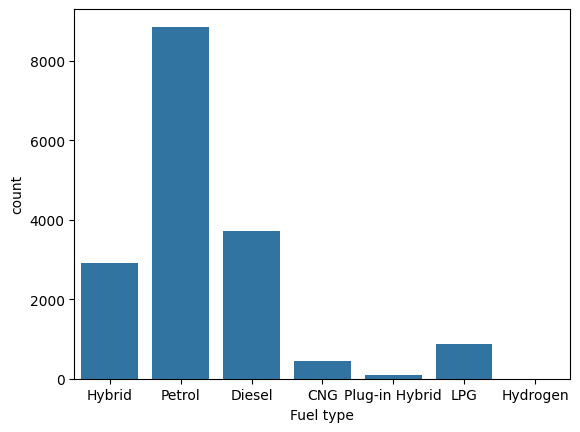

In [ ]:
sns.countplot(data = df, x = "Fuel type")

В наас є три головні - Гібрід, Бензин, Дизель. Є 4 непопулярні, як можно, наприклад, об'єднати в other.

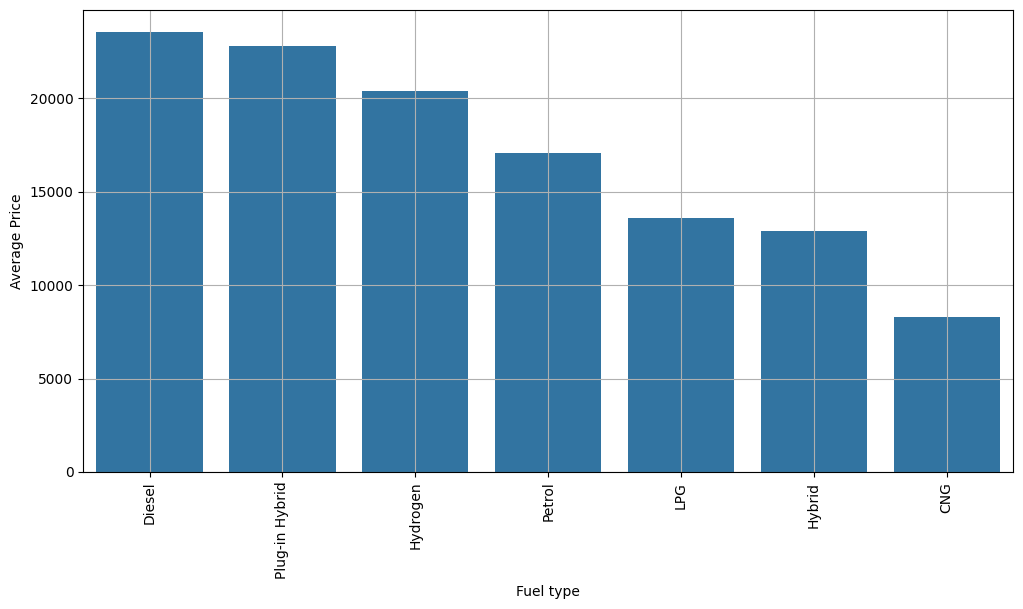

In [ ]:
agg_df = df.groupby('Fuel type')['Price'].mean().reset_index()

agg_df = agg_df.sort_values(by='Price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=agg_df, x='Fuel type', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Fuel type')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Але напсравді можно закодувати в одну колонку 0 - 6, бо є, по суті, помітна регрессія, між типом та ціною, де CNG - дешевші, Дизель - дорожчі.

## Engine volume

In [ ]:
df["Engine volume"]

,Engine volume
0,3.5
1,3
2,1.3
3,2.5
4,1.3
...,...
19231,3.5
19232,2.0 Turbo
19233,2.4
19234,2


In [ ]:
len(df["Engine volume"].unique())

98

In [ ]:
df["Engine volume"].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6',
       '2.0 Turbo', '2.2 Turbo', '3.3', '4.4', '3.0 Turbo', '1.4 Turbo',
       '3.6', '1.5', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2', '2.3 Turbo',
       '1.4', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2', '1.7', '2.9',
       '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo', '1.9', '2.7', '4.8',
       '5.5', '5.3', '2.8', '3.2 Turbo', '5', '1.1', '2.1', '0.7', '5.4',
       '1.3 Turbo', '4.7', '3.7', '1', '2.5 Turbo', '2.6', '1.9 Turbo',
       '4.7 Turbo', '0.8', '0.2 Turbo', '4.8 Turbo', '4.6 Turbo', '6.7',
       '1.2 Turbo', '3.4', '1.7 Turbo', '5.7', '2.7 Turbo', '0.4', '4.3',
       '4.2', '2.9 Turbo', '0', '4.4 Turbo', '3.6 Turbo', '0.3',
       '3.7 Turbo', '5.9', '0.2', '2.1 Turbo', '6.2', '6', '0.7 Turbo',
       '0.6 Turbo', '4.5', '5.5 Turbo', '0.6', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '0.9',
       '6.3 Turbo', '5.4 Turbo', '0.3 Turbo', '5.8', '1.1 Turbo', '5.

Нажаль колонку напряму в INT перетворити неможливо, але можно зробит колонку Turbo з значеннями True та False, а в оригінальній лише зилишити значення.
Давайте перевіремо, що умовний 1.6 Turbo відрізняється за ціною від 1.6 звичайного.

In [ ]:
df['Turbo'] = df['Engine volume'].apply(lambda x: 1 if 'Turbo' in x else 0)
df['Engine volume'] = df['Engine volume'].str.replace(' Turbo', '').astype(float)

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Leather interior,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,True,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False,0
2,8467,0,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False,0
3,3607,862,FORD,Escape,2011,Jeep,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,True,0
4,11726,446,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,True,0


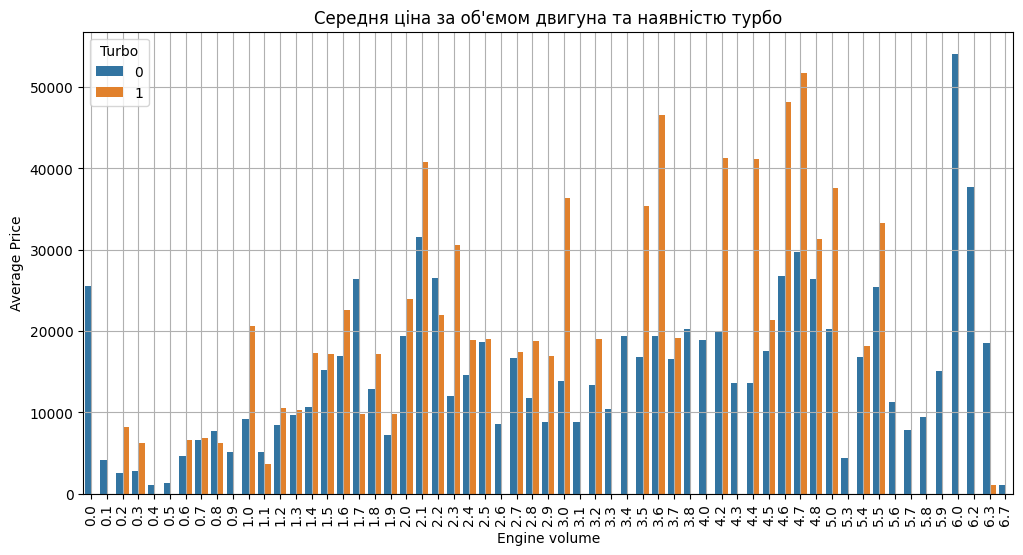

In [ ]:
agg_df = df.groupby(['Engine volume', 'Turbo'])['Price'].mean().reset_index()

agg_df = agg_df.sort_values(by='Price', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=agg_df, x='Engine volume', y='Price', hue='Turbo')
plt.xticks(rotation=90)
plt.xlabel('Engine volume')
plt.ylabel('Average Price')
plt.grid(True)
plt.title('Середня ціна за об\'ємом двигуна та наявністю турбо')
plt.show()

Турбо двигуни такі дорожчі.

## Mileage

In [ ]:
df['Mileage']

,Mileage
0,186005 km
1,192000 km
2,200000 km
3,168966 km
4,91901 km
...,...
19231,107800 km
19232,300000 km
19233,161600 km
19234,116365 km


In [ ]:
df['Mileage'] = [float(value.split(' ')[0]) for value in df['Mileage']]

In [ ]:
df['Mileage']

,Mileage
0,186005.0
1,192000.0
2,200000.0
3,168966.0
4,91901.0
...,...
19231,107800.0
19232,300000.0
19233,161600.0
19234,116365.0


<Axes: xlabel='Mileage', ylabel='Price'>

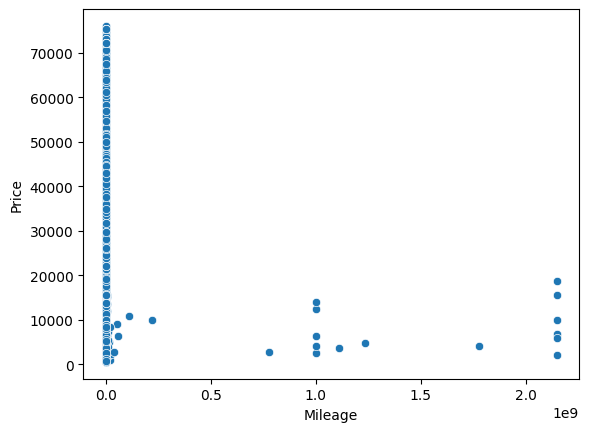

In [ ]:
sns.scatterplot(data=df, y='Price', x='Mileage')

In [ ]:
mean = df['Mileage'].mean()
std_dev = df['Mileage'].std()

lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

df = df[(df['Mileage'] >= lower_bound) & (df['Mileage'] <= upper_bound)]

<Axes: xlabel='Mileage', ylabel='Price'>

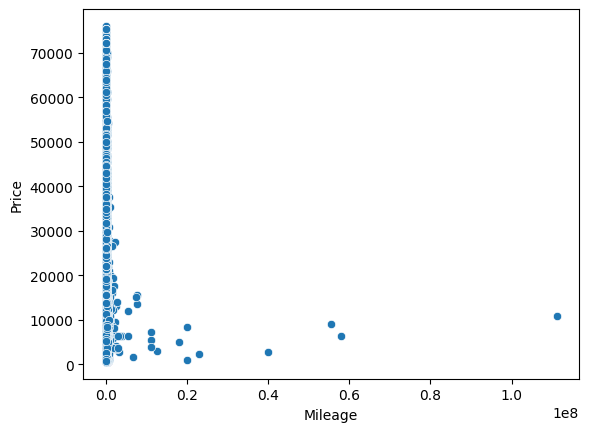

In [ ]:
sns.scatterplot(data=df, y='Price', x='Mileage')

<Axes: xlabel='Mileage', ylabel='Price'>

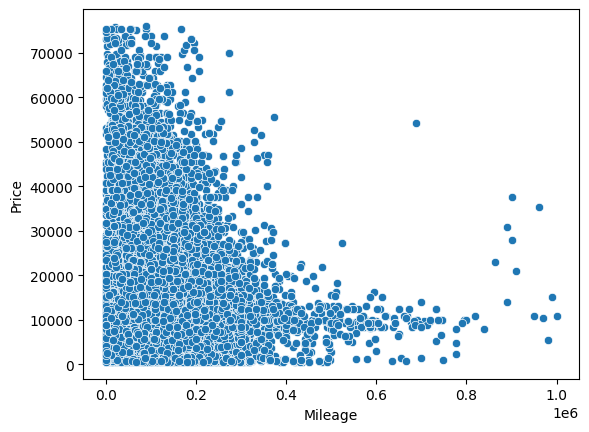

In [ ]:
sns.scatterplot(data=df[df['Mileage'] < 1000000], y='Price', x='Mileage')

Менша пробіжка - більша ціна. Логічно.

## Cylinders

In [ ]:
df["Cylinders"].info()

<class 'pandas.core.series.Series'>
Index: 16898 entries, 0 to 19235
Series name: Cylinders
Non-Null Count  Dtype  
--------------  -----  
16898 non-null  float64
dtypes: float64(1)
memory usage: 264.0 KB


Наче все прекрасно і нічого з додатково робити не треба.

<Axes: xlabel='Cylinders', ylabel='Price'>

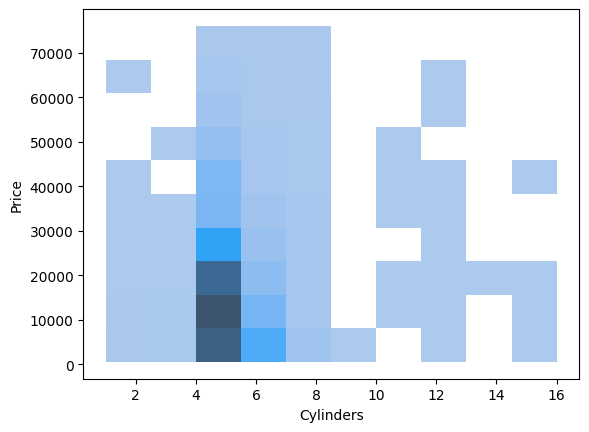

In [ ]:
sns.histplot(data=df, y='Price', x='Cylinders', bins = 10)

<Axes: xlabel='Cylinders', ylabel='Price'>

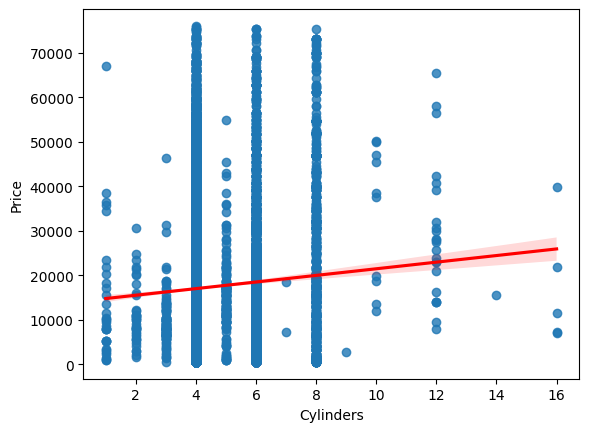

In [ ]:
sns.regplot(data=df, y='Price', x='Cylinders', line_kws={'color':'red'})

Тобто трошки є залежність циліндрів та ціни, більше - дорожче, але не значна. Можливо ця колонка мало корисна.

## Gear box type

In [ ]:
df['Gear box type'].unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

<Axes: xlabel='Price', ylabel='Count'>

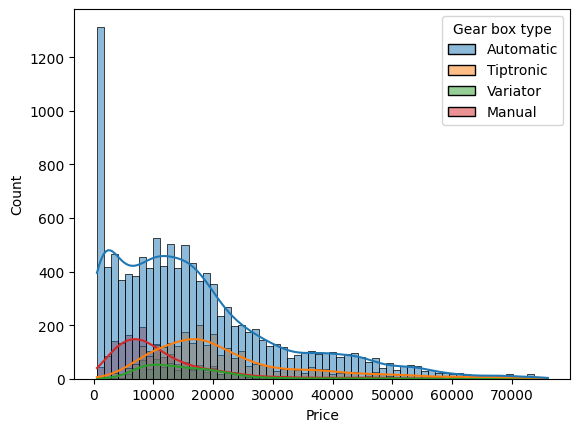

In [ ]:
sns.histplot(data=df, x='Price', hue = 'Gear box type', kde = True)

Автомат покриває всі цінові категорії, Мануальна хнаходиться більше серед дешевих машин, Тіпронік частіше відповідає дорожчим машинам.

<Axes: xlabel='Prod. year', ylabel='Count'>

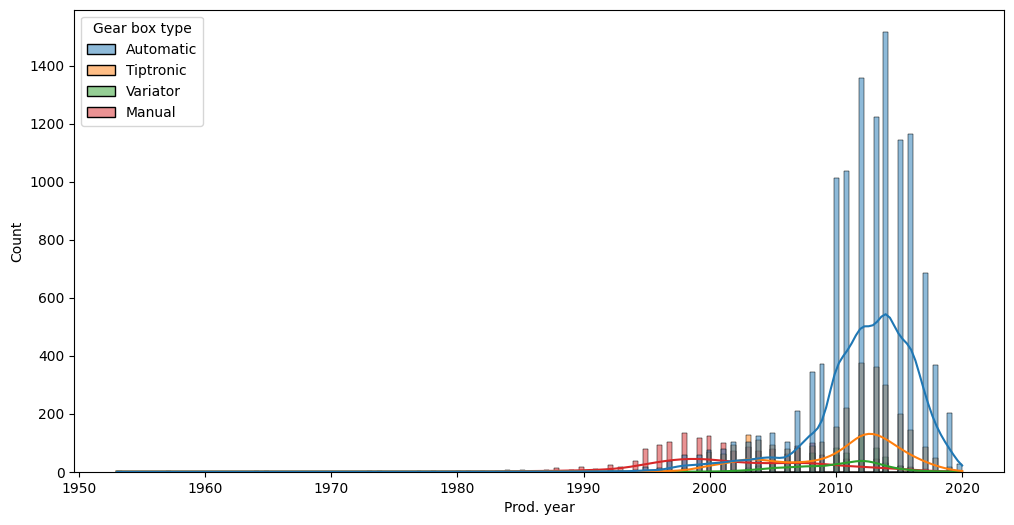

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Prod. year', hue = 'Gear box type', kde = True)

<Axes: xlabel='Prod. year', ylabel='Price'>

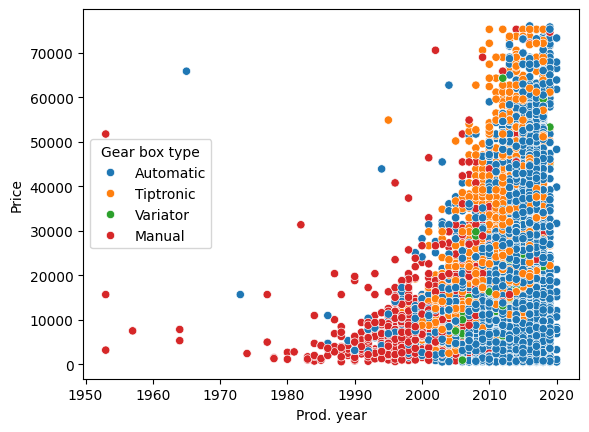

In [ ]:
sns.scatterplot(data=df, y='Price', x='Prod. year', hue = 'Gear box type')

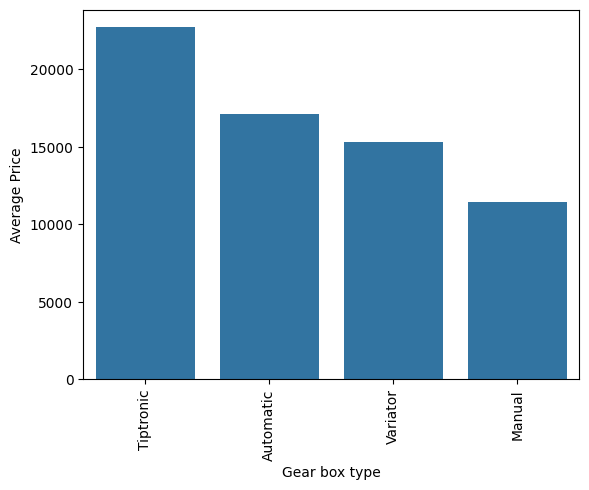

In [ ]:
agg_df = df.groupby('Gear box type')['Price'].mean().reset_index()
agg_df = agg_df.sort_values(by='Price', ascending=False)
sns.barplot(data=agg_df, x='Gear box type', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Gear box type')
plt.ylabel('Average Price')
plt.show()

In [ ]:
df[df['Gear box type'] == 'Tiptronic'].groupby('Manufacturer').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10)

,Manufacturer,Count
24,MERCEDES-BENZ,523
3,BMW,447
36,TOYOTA,393
13,HYUNDAI,324
38,VOLKSWAGEN,206
10,FORD,113
6,CHEVROLET,104
17,KIA,100
27,NISSAN,81
26,MITSUBISHI,76


Отже, мануальні коробки це здебільшого старі машини.
Тріптонік це такі ж нові як і автомат, але більш дорогі.

## Drive wheels

In [ ]:
df['Drive wheels'].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

<Axes: xlabel='Price', ylabel='Count'>

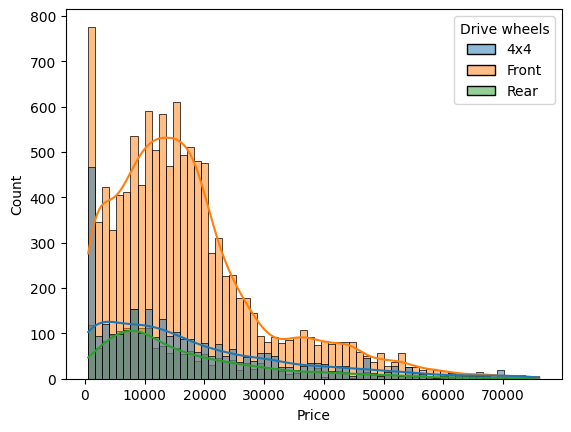

In [ ]:
sns.histplot(data=df, x='Price', hue = 'Drive wheels', kde = True)

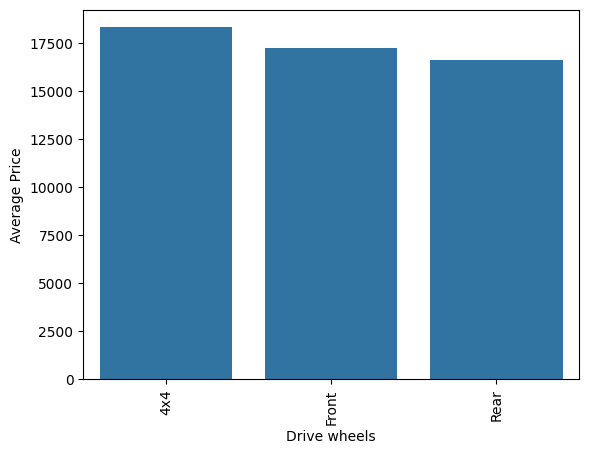

In [ ]:
agg_df = df.groupby('Drive wheels')['Price'].mean().reset_index()
agg_df = agg_df.sort_values(by='Price', ascending=False)
sns.barplot(data=agg_df, x='Drive wheels', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Drive wheels')
plt.ylabel('Average Price')
plt.show()

Вони майже однакові. Можливо не дуже корисна колонкаю

In [ ]:
df = pd.get_dummies(df, columns=['Drive wheels'], drop_first=True)

In [ ]:
df['Drive wheels_Front'] = df['Drive wheels_Front'].astype(int)
df['Drive wheels_Rear'] = df['Drive wheels_Rear'].astype(int)

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Wheel,Color,Airbags,Leather interior,Turbo,Drive wheels_Front,Drive wheels_Rear
0,13328,1399,LEXUS,RX 450,2010,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,4-5,Left wheel,Silver,12,1,0,0,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,Petrol,3.0,192000.0,6.0,Tiptronic,4-5,Left wheel,Black,8,0,0,0,0
2,8467,0,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000.0,4.0,Variator,4-5,Right-hand drive,Black,2,0,0,1,0
3,3607,862,FORD,Escape,2011,Jeep,Hybrid,2.5,168966.0,4.0,Automatic,4-5,Left wheel,White,0,1,0,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901.0,4.0,Automatic,4-5,Left wheel,Silver,4,1,0,1,0


## Doors

In [ ]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [ ]:
df['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

<Axes: xlabel='Price', ylabel='Count'>

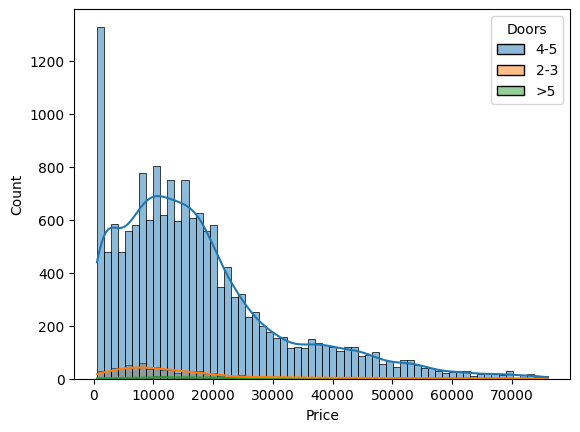

In [ ]:
sns.histplot(data=df, x='Price', hue = 'Doors', kde = True)

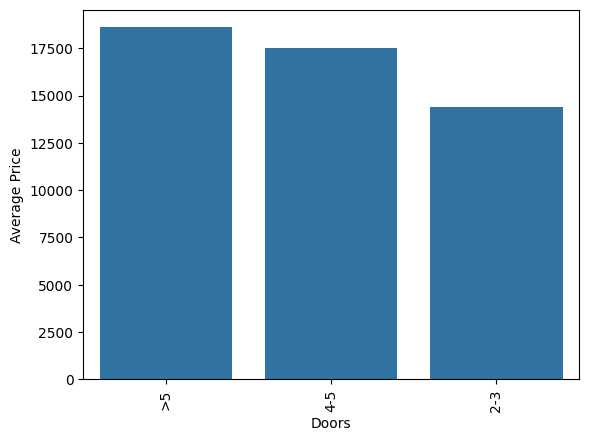

In [ ]:
agg_df = df.groupby('Doors')['Price'].mean().reset_index()
agg_df = agg_df.sort_values(by='Price', ascending=False)
sns.barplot(data=agg_df, x='Doors', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Doors')
plt.ylabel('Average Price')
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['Doors'], drop_first=True)

In [ ]:
df['Doors_4-5'] = df['Doors_4-5'].astype(int)
df['Doors_>5'] = df['Doors_>5'].astype(int)

In [ ]:
df.head(1)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags,Leather interior,Turbo,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Doors_4-5,Doors_>5
0,13328,1399,LEXUS,RX 450,2010,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,Silver,12,1,0,0,0,0,1,0


## Wheel

In [ ]:
df["Wheel"].unique()

array(['Left wheel', 'Right-hand drive'], dtype=object)

In [ ]:
df = pd.get_dummies(df, columns=['Wheel'], drop_first=True)

In [ ]:
df['Wheel_Right-hand drive'] = df['Wheel_Right-hand drive'].astype(int)

<Axes: xlabel='Prod. year', ylabel='Price'>

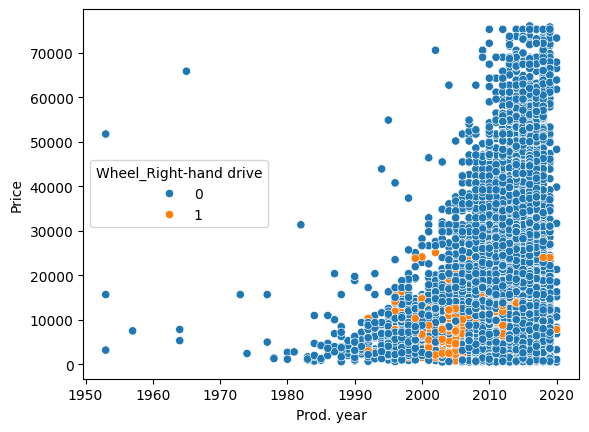

In [ ]:
sns.scatterplot(data=df, y='Price', x='Prod. year', hue = 'Wheel_Right-hand drive')

Виглядає не супер корисно. Машини з правостороннім рулем здебільшого старі, і їх мало.

## Color

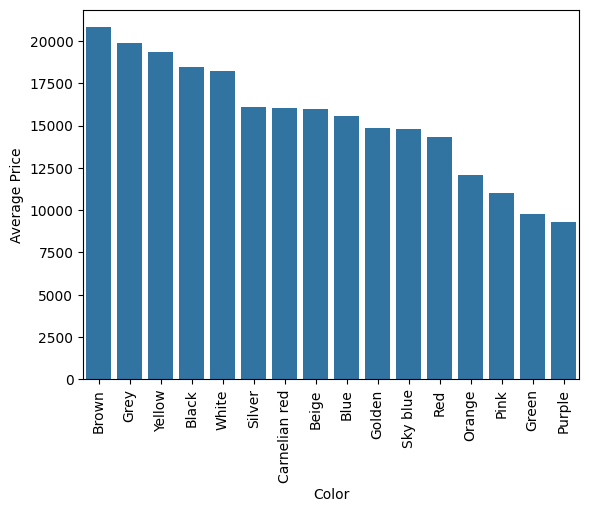

In [ ]:
agg_df = df.groupby('Color')['Price'].mean().reset_index()
agg_df = agg_df.sort_values(by='Price', ascending=False)
sns.barplot(data=agg_df, x='Color', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Color')
plt.ylabel('Average Price')
plt.show()

Це трохи несподівано. Я думав що буде 0 взаємовзв'язку кольору та ціни, але маємо що маємо.

## Airbags

In [ ]:
df['Airbags'].info()

<class 'pandas.core.series.Series'>
Index: 16898 entries, 0 to 19235
Series name: Airbags
Non-Null Count  Dtype
--------------  -----
16898 non-null  int64
dtypes: int64(1)
memory usage: 264.0 KB


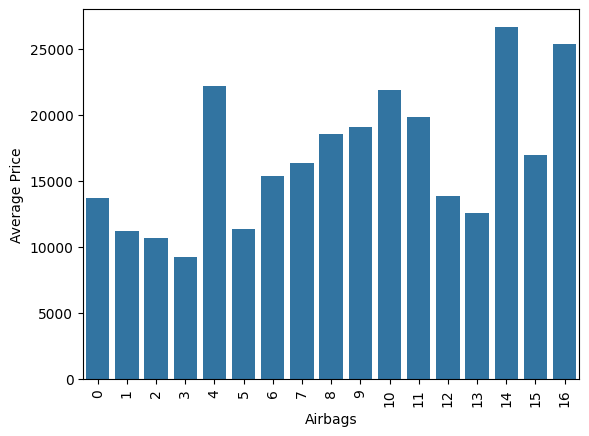

In [ ]:
agg_df = df.groupby('Airbags')['Price'].mean().reset_index()
agg_df = agg_df.sort_values(by='Price', ascending=False)
sns.barplot(data=agg_df, x='Airbags', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Airbags')
plt.ylabel('Average Price')
plt.show()

# Обробка колонок для подальшого будування моделі

## Обробка категоріальних колонок

### Preview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16898 entries, 0 to 19235
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   16898 non-null  int64  
 1   Levy                    16898 non-null  int64  
 2   Manufacturer            16898 non-null  object 
 3   Model                   16898 non-null  object 
 4   Prod. year              16898 non-null  int64  
 5   Category                16898 non-null  object 
 6   Fuel type               16898 non-null  object 
 7   Engine volume           16898 non-null  float64
 8   Mileage                 16898 non-null  float64
 9   Cylinders               16898 non-null  float64
 10  Gear box type           16898 non-null  object 
 11  Color                   16898 non-null  object 
 12  Airbags                 16898 non-null  int64  
 13  Leather interior        16898 non-null  int64  
 14  Turbo                   16898 non-null  int

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Color,Airbags,Leather interior,Turbo,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive
0,13328,1399,LEXUS,RX 450,2010,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,4-5,Silver,12,1,0,0,0,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,Petrol,3.0,192000.0,6.0,Tiptronic,4-5,Black,8,0,0,0,0,0
2,8467,0,HONDA,FIT,2006,Hatchback,Petrol,1.3,200000.0,4.0,Variator,4-5,Black,2,0,0,1,0,1
3,3607,862,FORD,Escape,2011,Jeep,Hybrid,2.5,168966.0,4.0,Automatic,4-5,White,0,1,0,0,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Petrol,1.3,91901.0,4.0,Automatic,4-5,Silver,4,1,0,1,0,0


### Manufacturer

In [ ]:
len(df['Manufacturer'].unique())

61

In [ ]:
threshold = 0.05 * len(df)
manufacturer_counts = df['Manufacturer'].value_counts()

manufacturers_to_keep = manufacturer_counts[manufacturer_counts >= threshold].index

df['Manufacturer'] = df['Manufacturer'].apply(lambda x: x if x in manufacturers_to_keep else 'Other')

manufacturer_avg_price = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)

manufacturer_mapping = {manufacturer: idx for idx, manufacturer in enumerate(manufacturer_avg_price.index)}

df['Manufacturer'] = df['Manufacturer'].map(manufacturer_mapping)

In [ ]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags,Leather interior,Turbo,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Doors_4-5,Doors_>5
0,13328,1399,4,RX 450,2010,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,Silver,12,1,0,0,0,0,1,0
1,16621,1018,5,Equinox,2011,Jeep,Petrol,3.0,192000.0,6.0,Tiptronic,Black,8,0,0,0,0,0,1,0
2,8467,0,4,FIT,2006,Hatchback,Petrol,1.3,200000.0,4.0,Variator,Black,2,0,0,1,0,1,1,0
3,3607,862,6,Escape,2011,Jeep,Hybrid,2.5,168966.0,4.0,Automatic,White,0,1,0,0,0,0,1,0
4,11726,446,4,FIT,2014,Hatchback,Petrol,1.3,91901.0,4.0,Automatic,Silver,4,1,0,1,0,0,1,0


### Model

In [ ]:
len(df['Model'].unique())

1494

In [ ]:
threshold = 0.05 * len(df)
model_counts = df['Model'].value_counts()
models_to_keep = model_counts[model_counts >= threshold].index
df['Model'] = df['Model'].apply(lambda x: x if x in models_to_keep else 'Other')
model_avg_price = df.groupby('Model')['Price'].mean().sort_values(ascending=False)
model_mapping = {model: idx for idx, model in enumerate(model_avg_price.index)}
df['Model'] = df['Model'].map(model_mapping)

In [ ]:
df.head(20)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Color,Airbags,Leather interior,Turbo,Drive wheels_Front,Drive wheels_Rear,Wheel_Right-hand drive,Doors_4-5,Doors_>5
0,13328,1399,4,0,2010,Jeep,Hybrid,3.5,186005.0,6.0,Automatic,Silver,12,1,0,0,0,0,1,0
1,16621,1018,5,0,2011,Jeep,Petrol,3.0,192000.0,6.0,Tiptronic,Black,8,0,0,0,0,0,1,0
2,8467,0,4,0,2006,Hatchback,Petrol,1.3,200000.0,4.0,Variator,Black,2,0,0,1,0,1,1,0
3,3607,862,6,0,2011,Jeep,Hybrid,2.5,168966.0,4.0,Automatic,White,0,1,0,0,0,0,1,0
4,11726,446,4,0,2014,Hatchback,Petrol,1.3,91901.0,4.0,Automatic,Silver,4,1,0,1,0,0,1,0
5,39493,891,0,0,2016,Jeep,Diesel,2.0,160931.0,4.0,Automatic,White,4,1,0,1,0,0,1,0
6,1803,761,3,3,2010,Hatchback,Hybrid,1.8,258909.0,4.0,Automatic,White,12,1,0,1,0,0,1,0
7,549,751,0,2,2013,Sedan,Petrol,2.4,216118.0,4.0,Automatic,Grey,12,1,0,1,0,0,1,0
8,1098,394,3,0,2014,Sedan,Hybrid,2.5,398069.0,4.0,Automatic,Black,12,1,0,1,0,0,1,0
9,26657,0,4,0,2007,Jeep,Petrol,3.5,128500.0,6.0,Automatic,Silver,12,1,0,0,0,0,1,0


### Category

In [ ]:
len(df['Category'].unique())

11

In [ ]:
category_avg_price = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
category_mapping = {category: idx for idx, category in enumerate(category_avg_price.index)}
df['Category'] = df['Category'].map(category_mapping)

### Fuel type

In [ ]:
len(df['Fuel type'].unique())

7

In [ ]:
fuel_avg_price = df.groupby('Fuel type')['Price'].mean().sort_values(ascending=False)
fuel_mapping = {fuel: idx for idx, fuel in enumerate(fuel_avg_price.index)}
df['Fuel type'] = df['Fuel type'].map(fuel_mapping)

### Gear box type

In [ ]:
len(df['Gear box type'].unique())

4

In [ ]:
gearbox_avg_price = df.groupby('Gear box type')['Price'].mean().sort_values(ascending=False)
gearbox_mapping = {gearbox: idx for idx, gearbox in enumerate(gearbox_avg_price.index)}
df['Gear box type'] = df['Gear box type'].map(gearbox_mapping)

### Color

In [ ]:
len(df['Color'].unique())

16

In [ ]:
color_avg_price = df.groupby('Color')['Price'].mean().sort_values(ascending=False)
color_mapping = {color: idx for idx, color in enumerate(color_avg_price.index)}
df['Color'] = df['Color'].map(color_mapping)

## Збереження датасету №1

In [ ]:
df.to_csv('/content/drive/MyDrive/Datasets/car_price_prediction_EDA_1.csv', index=False)

# Вибір корисних колонок

<Axes: >

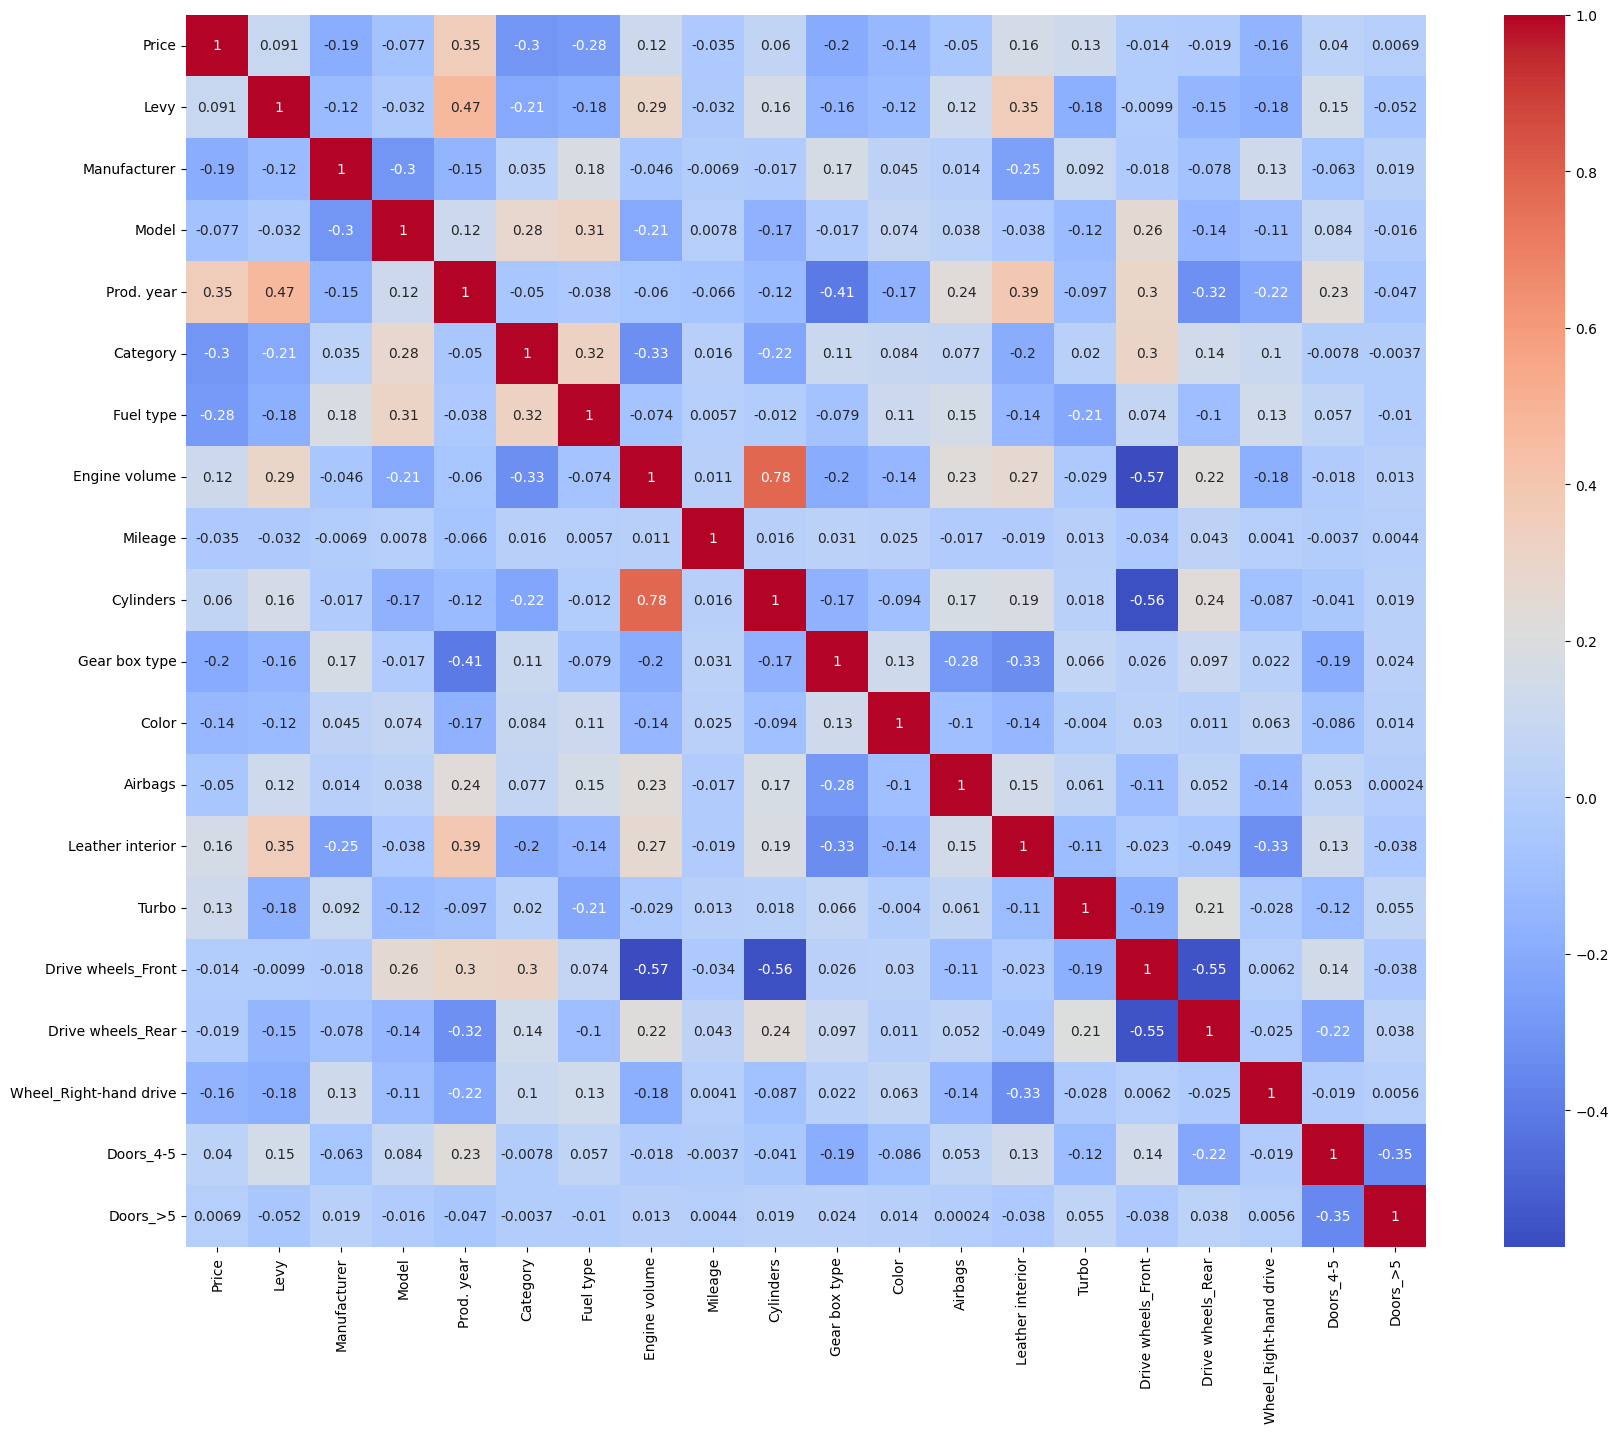

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Дуже несподівано, але з безпосередньо з ціною гарно корелію лише рік виробництва, категорія авто, та паливо.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['Manufacturer', 'Prod. year', 'Category', 'Fuel type', 'Engine volume',
       'Gear box type', 'Color', 'Leather interior', 'Turbo',
       'Wheel_Right-hand drive'],
      dtype='object')
